In [0]:
#All import statements here
import pandas as pd
import numpy as np
import requests
import sklearn.metrics as sk                   
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import random

In [0]:
#Code for scraping CSV file names from Github
links=[]
if requests.get("https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports").status_code==200:        
  divs = BeautifulSoup(requests.get("https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports").content, 'html.parser').select("div.Box.mb-3.Box--condensed table.files.js-navigation-container.js-active-navigation-container tbody tr.js-navigation-item")
  for idx, div in enumerate(divs):
    url_href=div.select("td.content span.css-truncate.css-truncate-target a.js-navigation-open ")
    if url_href!=[]:
      links.append(("https://raw.githubusercontent.com"+url_href[0].get('href')).replace('blob/',''))
links = links[1:-1]
links


['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv',
 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv',
 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv',
 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv',
 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv',
 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv',
 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-28-2020.csv',
 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_da

In [0]:

finaldata = pd.DataFrame( index = ['Date'])

#these will become population of each country get later, each index relates to each country
countrypop = [1386000000,51470000,60480000,3227200000,66990000]

#store value for processing in here, each row is the date starting at 1-22-2020, each column is the country sorted by the value remaps (organized in alphabetical order)
countryval = [0] * len(countrypop)
temp = [0] * len(countrypop) #store value to be appended to countryval

#this part goes into for loop, removes unwanted columns, then unwanted countries, then does math for values and places in each countries index
for j in range (0, len(links)):
    data = pd.read_csv(links[j], index_col = 0)
    data = data.rename(columns = {'Country_Region' : 'Country/Region'}) #country and region changes at some point, should prevent errors
    data = data[['Country/Region', 'Confirmed', 'Deaths', 'Recovered']] #only values we care aboutUS
    data['Country/Region'] = data['Country/Region'].map({'Mainland China' : 'China', 'China' : 'China', 'US' : 'US', 'United States' : 'US', 'South Korea' : 'South Korea', 'Republic of Korea' : 'South Korea', 'Korea, South' : 'South Korea', 'Italy' : 'Italy','France' : 'France'}) #update when we want more countries
    data = data.dropna()
    data = data.groupby(['Country/Region']).sum()
    data = data.reindex(['China', 'South Korea', 'Italy', 'US', 'France'])
    data = data.reset_index()
    data.insert (3, 'Date', [links[j][112:122]]*len(data), True)
    data = data.set_index('Date')
    
    check = data.to_numpy()
    check = np.delete(check,0,1)

    #calculate adjusted value for each country then store to main list
    for i in range (0, len(countrypop)): #country has shown up
        if i < np.size(check,0):
            temp[i] = (check[i,0] - check[i,1] - check[i,2])
        else:
            temp[i] = 0 # no data yet on given country
    countryval = np.vstack((countryval, temp))
    #calculate percent population and store in dataframe
    for i in range (0, len(countrypop)):
        temp[i] = temp[i] / countrypop[i]
    data.insert (4, 'Amount of Population', temp[0:len(data)], True)
    finaldata = finaldata.append(data)

countryval = np.delete (countryval, 0, 0)
finaldata = finaldata.drop(finaldata.index[0])
finaldata = finaldata.fillna(int(0))
# print(finaldata)

**EDA STARTS BELOW**









1. First 20 Values

In [0]:

finaldata.head(20)

,Country/Region,Confirmed,Deaths,Recovered,Amount of Population
01-22-2020,China,444.0,17.0,28.0,2.878788e-07
01-22-2020,South Korea,0.0,0.0,0.0,0.000000e+00
01-22-2020,Italy,0.0,0.0,0.0,0.000000e+00
01-22-2020,US,0.0,0.0,0.0,0.000000e+00
01-22-2020,France,0.0,0.0,0.0,0.000000e+00
01-23-2020,China,444.0,17.0,28.0,2.878788e-07
01-23-2020,South Korea,0.0,0.0,0.0,0.000000e+00
01-23-2020,Italy,0.0,0.0,0.0,0.000000e+00
01-23-2020,US,0.0,0.0,0.0,0.000000e+00
01-23-2020,France,0.0,0.0,0.0,0.000000e+00


In [0]:
#Preparing DataFrames for Graphs 

#For China
ch_df = finaldata[finaldata['Country/Region']== 'China'][['Country/Region', 'Confirmed','Recovered','Deaths','Amount of Population']]
ch_lst = []
ch_lst.append(int(ch_df['Confirmed'][0]))
for i in range(1,len(ch_df['Confirmed'])):
  ch_lst.append(int(ch_df['Confirmed'][i] - ch_df['Confirmed'][i-1]))
ch_df['Cases Per Day'] = ch_lst
ch_lst = []
for i in range(len(ch_df['Confirmed'])):
  ch_lst.append(int(ch_df['Confirmed'][i] - (ch_df['Recovered'][i] + ch_df['Deaths'][i])))
ch_df['Active'] = ch_lst

#For South Korea
sk_df = finaldata[finaldata['Country/Region']== 'South Korea'][['Country/Region', 'Confirmed','Recovered','Deaths','Amount of Population']]
sk_lst = []
sk_lst.append(int(sk_df['Confirmed'][0]))
for i in range(1,len(sk_df['Confirmed'])):
  sk_lst.append(int(sk_df['Confirmed'][i] - sk_df['Confirmed'][i-1]))
sk_df['Cases Per Day'] = sk_lst
sk_lst = []
for i in range(len(sk_df['Confirmed'])):
  sk_lst.append(int(sk_df['Confirmed'][i] - (sk_df['Recovered'][i] + sk_df['Deaths'][i])))
sk_df['Active'] = sk_lst

#For US
us_df = finaldata[finaldata['Country/Region']== 'US'][['Country/Region', 'Confirmed','Recovered','Deaths','Amount of Population']]
us_lst = []
us_lst.append(int(us_df['Confirmed'][0]))
for i in range(1,len(us_df['Confirmed'])):
  us_lst.append(int(us_df['Confirmed'][i] - us_df['Confirmed'][i-1]))
us_df['Cases Per Day'] = us_lst
us_lst = []
for i in range(len(us_df['Confirmed'])):
  us_lst.append(int(us_df['Confirmed'][i] - (us_df['Recovered'][i] + us_df['Deaths'][i])))
us_df['Active'] = us_lst

2. Line Graph for Case Count

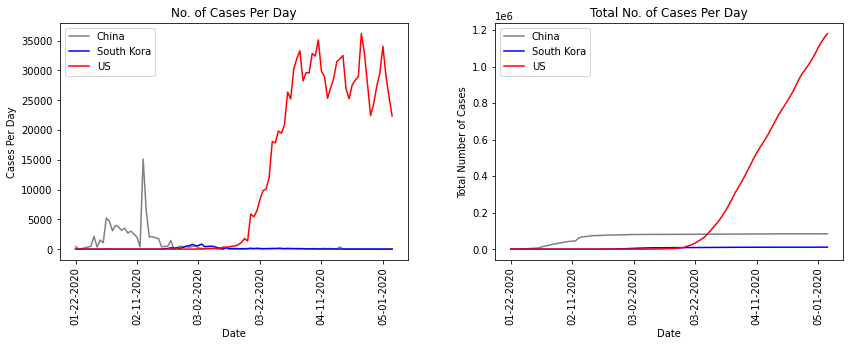

In [0]:
fig, ax = plt.subplots(ncols=2, figsize=(13,6))

ch_df[['Country/Region', 'Cases Per Day']].plot(kind='line',color = 'gray',rot=90, ax = ax[0])
sk_df[['Country/Region', 'Cases Per Day']].plot(kind='line',color = 'blue',rot=90, ax = ax[0])
us_df[['Country/Region', 'Cases Per Day']].plot(kind='line',color = 'red',rot=90, ax = ax[0])
# plt.yticks(np.arange(0, max(max(us_lst),max(ch_lst),max(sk_lst)), 1000)) 
# plt.xticks(range(0,len(sk_df[['Country/Region', 'Cases Per Day']].index)), sk_df[['Country/Region', 'Cases Per Day']].index)

ch_df[['Country/Region', 'Confirmed']].plot(kind='line',color = 'gray',rot=90, ax = ax[1])
sk_df[['Country/Region', 'Confirmed']].plot(kind='line',color = 'blue',rot=90, ax = ax[1])
us_df[['Country/Region', 'Confirmed']].plot(kind='line',color = 'red',rot=90, ax = ax[1])

ax[0].set(xlabel='Date', ylabel='Cases Per Day', title = 'No. of Cases Per Day')
ax[0].legend(["China", "South Kora", "US"])

ax[1].set(xlabel='Date', ylabel='Total Number of Cases', title = 'Total No. of Cases Per Day')
ax[1].legend(["China", "South Kora", "US"])

fig.tight_layout(pad=5.0)
plt.show()

3. Line Graph for Confirmed VS Active Cases

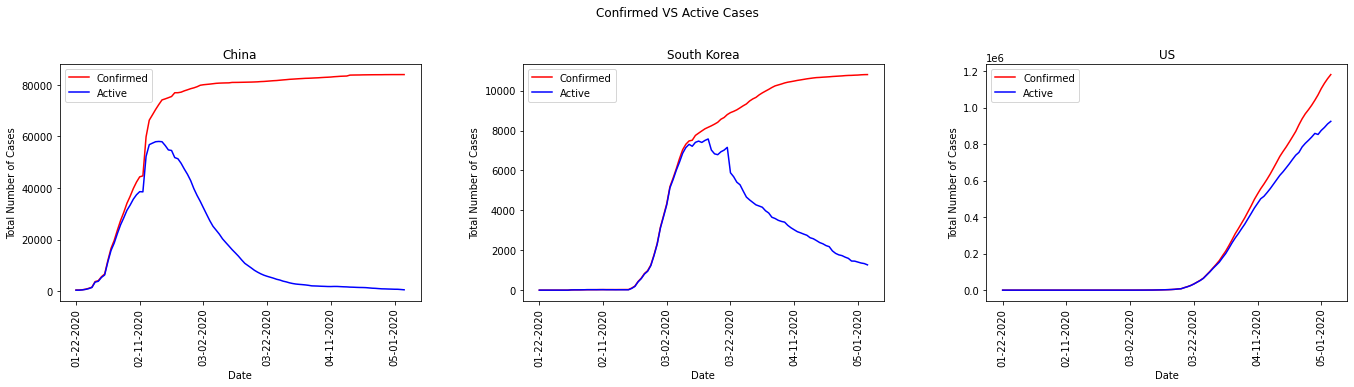

In [0]:
fig, ax = plt.subplots(ncols=3, figsize=(20,6))

ch_df[['Country/Region', 'Confirmed']].plot(kind='line',color = 'red',rot=90, ax = ax[0])
ch_df[['Country/Region', 'Active']].plot(kind='line',color = 'blue',rot=90, ax = ax[0])

sk_df[['Country/Region', 'Confirmed']].plot(kind='line',color = 'red',rot=90, ax = ax[1])
sk_df[['Country/Region', 'Active']].plot(kind='line',color = 'blue',rot=90, ax = ax[1])

us_df[['Country/Region', 'Confirmed']].plot(kind='line',color = 'red',rot=90, ax = ax[2])
us_df[['Country/Region', 'Active']].plot(kind='line',color = 'blue',rot=90, ax = ax[2])

ax[0].set(xlabel='Date', ylabel='Total Number of Cases', title = 'China')
ax[0].legend(["Confirmed", 'Active'])


ax[1].set(xlabel='Date', ylabel='Total Number of Cases', title = 'South Korea')
ax[1].legend(["Confirmed", 'Active'])

ax[2].set(xlabel='Date', ylabel='Total Number of Cases', title = 'US')
ax[2].legend(["Confirmed", 'Active'])
fig.suptitle('Confirmed VS Active Cases')
fig.tight_layout(pad=5.0)
plt.show()

4. Recovered VS Deaths

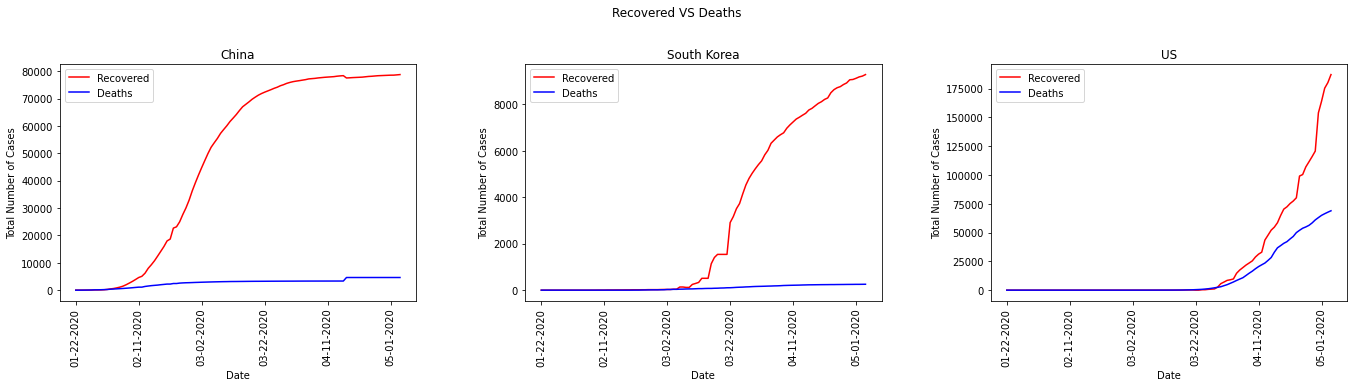

In [0]:
fig, ax = plt.subplots(ncols=3, figsize=(20,6))

ch_df[['Country/Region', 'Recovered']].plot(kind='line',color = 'red',rot=90, ax = ax[0])
ch_df[['Country/Region', 'Deaths']].plot(kind='line',color = 'blue',rot=90, ax = ax[0])

sk_df[['Country/Region', 'Recovered']].plot(kind='line',color = 'red',rot=90, ax = ax[1])
sk_df[['Country/Region', 'Deaths']].plot(kind='line',color = 'blue',rot=90, ax = ax[1])

us_df[['Country/Region', 'Recovered']].plot(kind='line',color = 'red',rot=90, ax = ax[2])
us_df[['Country/Region', 'Deaths']].plot(kind='line',color = 'blue',rot=90, ax = ax[2])

ax[0].set(xlabel='Date', ylabel='Total Number of Cases', title = 'China')
ax[0].legend(["Recovered", 'Deaths'])

ax[1].set(xlabel='Date', ylabel='Total Number of Cases', title = 'South Korea')
ax[1].legend(["Recovered", 'Deaths'])

ax[2].set(xlabel='Date', ylabel='Total Number of Cases', title = 'US')
ax[2].legend(["Recovered", 'Deaths'])
fig.suptitle('Recovered VS Deaths')
fig.tight_layout(pad=5.0)
plt.show()

5. % of population Affected

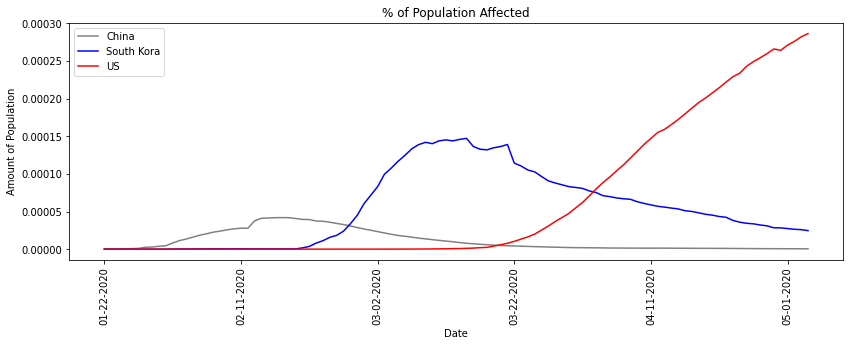

In [0]:
fig, ax = plt.subplots(ncols=1, figsize=(13,6))

ch_df[['Country/Region', 'Amount of Population']].plot(kind='line',color = 'gray',rot=90, ax = ax)
sk_df[['Country/Region', 'Amount of Population']].plot(kind='line',color = 'blue',rot=90, ax = ax)
us_df[['Country/Region', 'Amount of Population']].plot(kind='line',color = 'red',rot=90, ax = ax)

ax.set(xlabel='Date', ylabel='Amount of Population', title = '% of Population Affected')
ax.legend(["China", "South Kora", "US"])

fig.tight_layout(pad=5.0)
plt.show()

Note: The first three orders (0,1,2) were not considered viable
Best order for South Korea is order 10
Best order for United States is order 3
Best order for China is order 3


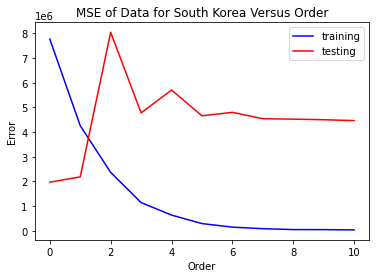

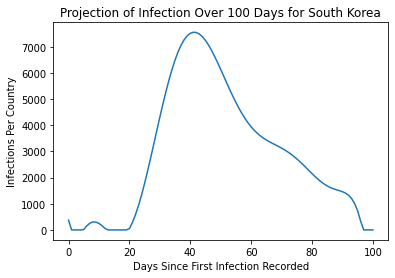

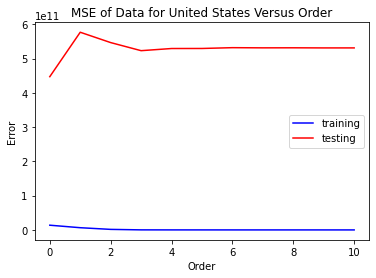

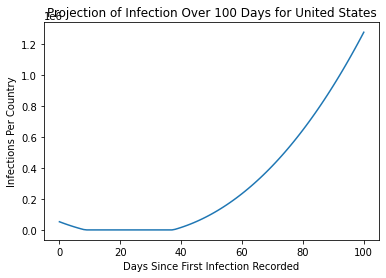

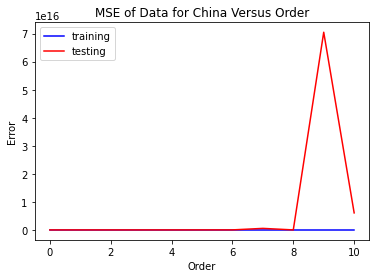

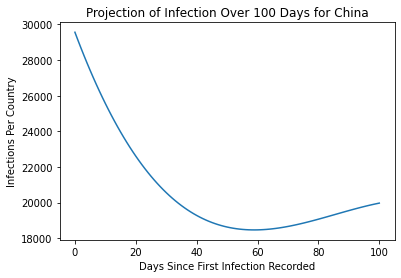

In [0]:
#model equations for South Korea, US, China

#arrays for country values

chinaval = []
skval = []
usval = []
franceval = []
italyval = [] 

#move values into arrays
for i in range(0,len(countryval)): #no values recorded until day 10 of recording for both US and SK
    chinaval.append(float(countryval[i,0]))#/countrypop[0])
for i in range(10,len(countryval)): #no values recorded until day 10 of recording for other countries
    chinaval.append(float(countryval[i,0]))#/countrypop[0])
    skval.append(float(countryval[i,1]))#/countrypop[1])
    italyval.append(float(countryval[i,2]))#/countrypop[2])
    usval.append(float(countryval[i,3]))#/countrypop[3])
    franceval.append(float(countryval[i,4]))#/countrypop[4])

#determine order for each model

def bestfitpoly (cval, cname): #function will determine best order, plot error vs order, and return equation using best coefficients
    errtrain = [] #hold mean error for train set
    errtest = [] #hold mean error for test set
    erruse = [] #take the difference between the two and sue as metric for what order to use
    #split data to 70-30 format, 70 to train, 30 to test
    shuffled_data = cval[:]
    train = shuffled_data[:70]
    test = shuffled_data[70:]
    x = np.arange(len(cval)) #length of full set
    x1 = np.arange(len(train)) #length of train set
    x2 = np.arange(len(test)) #length of test set
    for i in range (0,11): #check orders 0 to 10
        coef = np.polyfit(x1,np.array(train),i)
        eq = np.poly1d(coef)
        errtrain.append(sk.mean_squared_error(eq(x1),train)) #calcualte error of eequation for train set
        errtest.append(sk.mean_squared_error(eq(x2),test)) #calcualte error of eequation for test set set
        if (i > 2): #the first few runs will not produce solid enough evidence that the order is correct, ignore orders 0,1, and 2
            erruse.append(sk.mean_squared_error(eq(x2),test))


    #generate plot of error values
    plt.figure()
    plt.title('MSE of Data for ' + cname + ' Versus Order')
    plt.ylabel('Error')
    plt.xlabel('Order')
    plt.plot (np.arange(11),errtrain, 'b') #plot training error
    plt.plot (np.arange(11),errtest, 'r') #plot testing error
    plt.legend (["training", "testing"])
    print ('Best order for ' + cname + ' is order ' + str(3 + np.argmin(erruse))) #reason for 3 + : errus is offset by 3 to remove early runs
    neweq = np.poly1d(np.polyfit(x,np.array(cval), (3 + np.argmin(erruse))))

    #plot projection of the two models for the first 100 days after infection appearance
    plt.figure()
    plt.title ('Projection of Infection Over 100 Days for ' + cname)
    plt.ylabel('Infections Per Country')
    plt.xlabel('Days Since First Infection Recorded')
    #cannot have negative infections per population, remedied here
    days = np.arange(101)
    infections = neweq(days)
    for i in range (len(infections)):
        if (infections[i] <= 0): #can't have negative infections
            infections[i] = 0.0
    plt.plot(days,infections)
    return(neweq)

print ('Note: The first three orders (0,1,2) were not considered viable')
skeq = bestfitpoly(skval,'South Korea')
useq = bestfitpoly(usval,'United States')
ceq = bestfitpoly (chinaval, 'China')

In [0]:
#determine MAE of remaining datasets to the given model
                                                                                                    

def MSE_calculations (cval): #will give values needed for dataframe
    x = np.arange(len(cval))
    err  = []
    err.append(sk.mean_absolute_error(skeq(x),cval)) #value for south korean model
    err.append(sk.mean_absolute_error(useq(x),cval)) #value for US model
    err.append (sk.mean_absolute_error(ceq(x),cval))
    if (err[0] > err[1] and err[2] > err[1]): #more error in sk and china than us
        err.append('United States')
    elif (err[2] > err[0] and err[1] > err[0]): #more error in china and us than sk
        err.append('South Korea')
    elif (err[0] > err[2] and err[1] > err[2]): #more error in us and sk than china
        err.append('China')
    return (err)

#store data in frame for readability
data = [MSE_calculations (chinaval), MSE_calculations (italyval), MSE_calculations (franceval), MSE_calculations (usval), MSE_calculations (skval)]
datacomparison = pd.DataFrame(data = data,index = ['China', 'Italy','France','United States', 'South Korea'], columns = ['MAE for SK Model', 'MAE for US Model', 'MAE for China Model', 'Closest Model']) #dataframe will contain MSE when compared to the US model, the South Korean, and the model it closest resembles

datacomparison.head(5)

,MAE for SK Model,MAE for US Model,MAE for China Model,Closest Model
China,1.648436e+08,2.216293e+06,14382.396325,China
Italy,4.402087e+04,1.981143e+05,44620.883068,South Korea
France,3.345292e+04,2.091153e+05,36125.079431,South Korea
United States,2.273706e+05,3.678000e+04,229620.851238,United States
South Korea,1.637073e+02,2.420274e+05,17740.845599,South Korea
